In [1]:
import pandas as pd
import datetime
import statistics
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from PIL import Image

In [2]:
marathon_2016 = pd.read_csv('../assets/marathon_2016.csv')
marathon_2017 = pd.read_csv('../assets/marathon_2017.csv')
marathon_2018 = pd.read_csv('../assets/marathon_2018.csv')
marathon_2019 = pd.read_csv('../assets/marathon_2019.csv')
half_marathon_2016 = pd.read_csv('../assets/half_marathon_2016.csv')
half_marathon_2017 = pd.read_csv('../assets/half_marathon_2017.csv')
half_marathon_2018 = pd.read_csv('../assets/half_marathon_2018.csv')
half_marathon_2019 = pd.read_csv('../assets/half_marathon_2019.csv')

In [3]:
marathon_2016.drop(columns = 'Unnamed: 0', inplace = True, axis =1)
marathon_2017.drop(columns = 'Unnamed: 0', inplace = True, axis =1)
marathon_2018.drop(columns = 'Unnamed: 0', inplace = True, axis =1)
marathon_2019.drop(columns = 'Unnamed: 0', inplace = True, axis =1)

In [4]:
half_marathon_2016.drop(columns = 'Unnamed: 0', inplace = True, axis =1)
half_marathon_2017.drop(columns = 'Unnamed: 0', inplace = True, axis =1)
half_marathon_2018.drop(columns = 'Unnamed: 0', inplace = True, axis =1)
half_marathon_2019.drop(columns = 'Unnamed: 0', inplace = True, axis =1)

In [5]:
marathon_2016['first_name'] = marathon_2016['Name'].str.split(' ').str[0]
marathon_2016['last_name'] = marathon_2016['Name'].str.split(' ').str[1]

In [6]:
marathon_2017['first_name'] = marathon_2017['Name'].str.split(' ').str[0]
marathon_2017['last_name'] = marathon_2017['Name'].str.split(' ').str[1]

In [7]:
marathon_2018['first_name'] = marathon_2018['Name'].str.split(' ').str[0]
marathon_2018['last_name'] = marathon_2018['Name'].str.split(' ').str[1]

In [8]:
marathon_2019['first_name'] = marathon_2019['Name'].str.split(' ').str[0]
marathon_2019['last_name'] = marathon_2019['Name'].str.split(' ').str[1]

In [9]:
marathon_2016.first_name.value_counts()

David        48
Michael      47
Jennifer     41
James        37
Andrew       36
             ..
Byron         1
Carla         1
Janel         1
Veronika      1
Anastacia     1
Name: first_name, Length: 1226, dtype: int64

In [10]:
marathon_2017.first_name.value_counts()

Michael       50
John          46
David         39
Jennifer      36
Mark          35
              ..
Aine           1
Suzie          1
Sydney         1
Jarron         1
Margherita     1
Name: first_name, Length: 1258, dtype: int64

In [11]:
marathon_2018.first_name.value_counts()

Michael     28
Ryan        27
Chris       23
Kevin       21
Jennifer    21
            ..
Oryvie       1
Stefani      1
Anja         1
Raelyn       1
Radnee       1
Name: first_name, Length: 866, dtype: int64

In [12]:
marathon_2019.first_name.value_counts()

Michael    43
Daniel     32
John       30
David      30
Andrew     28
           ..
Regina      1
Antony      1
Bobbie      1
Rossa       1
Lupe        1
Name: first_name, Length: 1043, dtype: int64

In [13]:
#create year column
marathon_2016['year'] = '2016'
marathon_2017['year'] = '2017'
marathon_2018['year'] = '2018'
marathon_2019['year'] = '2019'

In [14]:
#combine all marathon data frames
marathons_all = pd.concat([marathon_2016, marathon_2017, marathon_2018, marathon_2019])

In [15]:
#convert to datetime
marathons_all['Time'] = pd.to_datetime(marathons_all['Time'])

In [16]:
#keep just the time
marathons_all['Time'] = marathons_all['Time'].dt.strftime('%H:%M:%S')

In [17]:
#marathons_all['Time'] = marathons_all['Time'].dt.time

In [18]:
#drop any row with time of '00:00:00'
marathons_all = marathons_all[marathons_all['Time'] != '00:00:00']

In [19]:
#create definition to covert time to seconds
def time_to_sec(time_str):
    return sum(x * int(t) for x, t in zip([1, 60, 3600], reversed(time_str.split(":"))))

In [20]:
#for loop to convert time to seconds using definition above
time_list = []
for row_ind, row_values in marathons_all.iterrows():
    time_list.append(time_to_sec(row_values['Time']))

In [21]:
#create new column in dataframe using list from for loop
marathons_all['time_sec'] = time_list

In [22]:
#mean time in seconds
mean = statistics.mean(time_list)
mean

17307.21133436373

In [23]:
#convert back to h, m, s
sec = mean
res = datetime.timedelta(seconds =sec)
print(res)

4:48:27.211334


In [24]:
#median time in seconds
median = statistics.median(time_list)

In [25]:
#convert back to h, m, s
sec = median
res = datetime.timedelta(seconds =sec)
print(res)

4:49:04


In [26]:
#create two separate dataframes with times above and below average
marathons_above = marathons_all[marathons_all['time_sec'] >= mean]
marathons_below = marathons_all[marathons_all['time_sec'] < mean]

In [27]:
#nuber of occurrences of each first name, above average time
marathons_above_average = marathons_above.first_name.value_counts().to_frame().reset_index()

In [28]:
#nuber of occurrences of each first name, below average time
marathons_below_average = marathons_below.first_name.value_counts().to_frame().reset_index()

In [29]:
#top ten names above average, rename columns, and sort
ma = marathons_above_average.head(10)
ma.columns = ['first_name', 'count']
ma = ma.sort_values(by='count')

In [30]:
#top ten names below average, rename columns, and sort
mb = marathons_below_average.head(10)
mb.columns = ['first_name', 'count']
mb = mb.sort_values(by='count')

In [31]:
#top ten first names overall 
marathons_all_df = marathons_all.first_name.value_counts().to_frame().reset_index()

In [32]:
marathons_all_df.head(10)

,index,first_name
0,Michael,132
1,David,105
2,John,91
3,Ryan,90
4,Jennifer,89
5,James,85
6,Chris,84
7,Andrew,83
8,Daniel,77
9,Mark,75


In [33]:
#same process as above for half marathons
half_marathon_2016['first_name'] = half_marathon_2016['Name'].str.split(' ').str[0]
half_marathon_2016['last_name'] = half_marathon_2016['Name'].str.split(' ').str[1]

In [34]:
half_marathon_2017['first_name'] = half_marathon_2017['Name'].str.split(' ').str[0]
half_marathon_2017['last_name'] = half_marathon_2017['Name'].str.split(' ').str[1]

In [35]:
half_marathon_2018['first_name'] = half_marathon_2018['Name'].str.split(' ').str[0]
half_marathon_2018['last_name'] = half_marathon_2018['Name'].str.split(' ').str[1]

In [36]:
half_marathon_2019['first_name'] = half_marathon_2019['Name'].str.split(' ').str[0]
half_marathon_2019['last_name'] = half_marathon_2019['Name'].str.split(' ').str[1]

In [37]:
half_marathon_2016['year'] = '2016'
half_marathon_2017['year'] = '2017'
half_marathon_2018['year'] = '2018'
half_marathon_2019['year'] = '2019'

In [38]:
half_marathons_all = pd.concat([half_marathon_2016, half_marathon_2017, half_marathon_2018, half_marathon_2019])

In [39]:
half_marathons_all['Time'] = pd.to_datetime(half_marathons_all['Time'])

In [40]:
half_marathons_all['Time'] = half_marathons_all['Time'].dt.strftime('%H:%M:%S')

In [41]:
half_marathons_all = half_marathons_all[half_marathons_all['Time'] != '00:00:00']

In [42]:
half_time_list = []
for row_ind, row_values in half_marathons_all.iterrows():
    half_time_list.append(time_to_sec(row_values['Time']))

In [43]:
half_marathons_all['time_sec'] = half_time_list

In [44]:
half_mean = statistics.mean(half_time_list)
half_mean

9317.811677401289

In [45]:
sec = half_mean
half_res = datetime.timedelta(seconds =sec)
print(half_res)

2:35:17.811677


In [46]:
half_marathons_above = half_marathons_all[half_marathons_all['time_sec'] >= half_mean]
half_marathons_below = half_marathons_all[half_marathons_all['time_sec'] < half_mean]

In [47]:
half_marathons_above_average = half_marathons_above.first_name.value_counts().to_frame().reset_index()
half_marathons_below_average = half_marathons_below.first_name.value_counts().to_frame().reset_index()

In [48]:
ha = half_marathons_above_average.head(10)
ha.columns = ['first_name', 'count']
ha = ha.sort_values(by='count')
ha

,first_name,count
9,Ashley,214
8,Lisa,219
7,Michelle,222
6,Jessica,225
5,Elizabeth,226
4,Mary,232
3,Sarah,241
2,Amanda,248
1,Amy,271
0,Jennifer,412


In [49]:
hb = half_marathons_below_average.head(10)
hb.columns = ['first_name', 'count']
hb = hb.sort_values(by='count')
hb

,first_name,count
9,Lauren,265
8,Chris,280
7,Matthew,281
6,Jessica,287
5,Emily,303
4,Sarah,387
3,David,392
2,Michael,419
1,John,422
0,Jennifer,423


In [50]:
#finding my name
heather = half_marathons_all[half_marathons_all['first_name'] == 'Heather']

In [51]:
#average Heather time
statistics.mean(heather['time_sec'])

9648.569230769232

In [52]:
sec = 9648.569230769232
half_res = datetime.timedelta(seconds =sec)
print(half_res)

2:40:48.569231


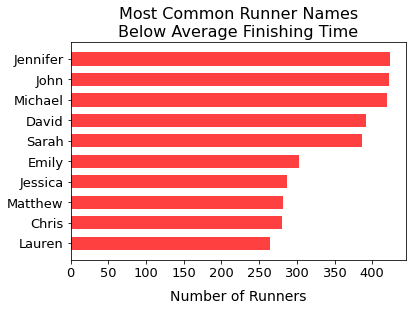

In [53]:
plt.barh('first_name', 'count', data = hb, height = 0.65, color = 'red', alpha = 0.75)
plt.title('Most Common Runner Names\nBelow Average Finishing Time', fontsize = 16)
plt.xticks(fontsize = 13)
plt.xlabel("Number of Runners", fontsize=14, labelpad=10)
plt.yticks(fontsize =13)
plt.savefig('hmba.jpeg')

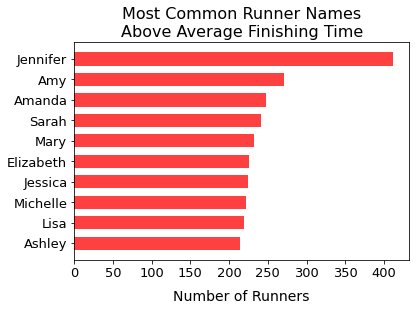

In [54]:
plt.barh('first_name', 'count', data = ha, height = 0.65, color = 'red', alpha = 0.75)
plt.title('Most Common Runner Names\nAbove Average Finishing Time', fontsize = 16)
plt.xticks(fontsize = 13)
plt.xlabel("Number of Runners", fontsize=14, labelpad=10)
plt.yticks(fontsize =13)
plt.savefig('hmaa.jpeg')

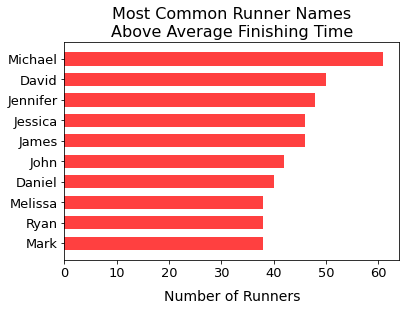

In [55]:
plt.barh('first_name', 'count', data = ma, height = 0.65, color = 'red', alpha = 0.75)
plt.title('Most Common Runner Names\nAbove Average Finishing Time', fontsize = 16)
plt.xticks(fontsize = 13)
plt.xlabel("Number of Runners", fontsize=14, labelpad=10)
plt.yticks(fontsize =13)
plt.savefig('maa.jpeg')

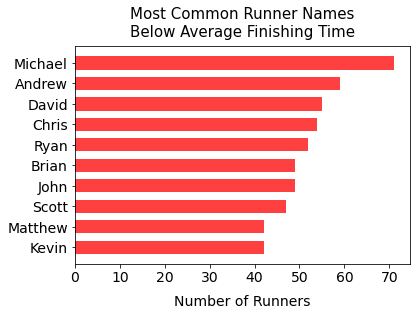

In [56]:
plt.barh('first_name', 'count', data = mb, height = 0.65, color = 'red', alpha = 0.75)
plt.title('Most Common Runner Names\nBelow Average Finishing Time', fontsize =15, pad = 10)
plt.xticks(fontsize = 14)
plt.xlabel("Number of Runners", fontsize=14, labelpad=10)
plt.yticks(fontsize =14)
plt.savefig('mba.jpeg')

In [57]:
half_marathons_all.shape

(64278, 8)

In [58]:
marathons_all.shape

(9705, 8)

In [59]:
#combine full and half marathons
races_all = pd.concat([marathons_all, half_marathons_all])

In [60]:
races_all_names = races_all.first_name.value_counts().to_frame().reset_index()

In [61]:
#rename columns
races_all_names.columns = ['first_name', 'count']

In [62]:
races_all_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6662 entries, 0 to 6661
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  6662 non-null   object
 1   count       6662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 104.2+ KB


In [63]:
#tried to figure out how to combine all names to make Word Cloud
races_all_names.groupby('first_name')['count'].apply(list).to_dict()

{'.rosalin': [3],
 'A': [1],
 'A.J.': [1],
 'A.T.': [2],
 'Aamir': [1],
 'Aaren': [1],
 'Aaro': [1],
 'Aaron': [138],
 'Aarti': [2],
 'Aashvi': [1],
 'Abagael': [1],
 'Abbe': [2],
 'Abbey': [30],
 'Abbi': [4],
 'Abbie': [14],
 'Abbigale': [1],
 'Abby': [75],
 'Abdi': [1],
 'Abdias': [1],
 'Abdiela': [1],
 'Abduhl': [1],
 'Abe': [1],
 'Abel': [3],
 'Abhay': [1],
 'Abhijit': [1],
 'Abhishek': [2],
 'Abi': [6],
 'Abigail': [83],
 'Abigale': [1],
 'Abishek': [1],
 'Abraham': [4],
 'Abteen': [1],
 'Ada': [4],
 'Adair': [1],
 'Adaline': [1],
 'Adam': [237],
 'Adams': [2],
 'Adaobi': [1],
 'Adarsh': [2],
 'Addie': [7],
 'Addison': [8],
 'Addrian': [1],
 'Addy': [2],
 'Adejoke': [1],
 'Adel': [1],
 'Adela': [2],
 'Adele': [6],
 'Adeline': [1],
 'Adena': [1],
 'Adia': [1],
 'Admon': [1],
 'Adnan': [1],
 'Adonis': [2],
 'Adoralida': [1],
 'Adreana': [1],
 'Adria': [6],
 'Adrian': [20],
 'Adriana': [15],
 'Adriann': [1],
 'Adrianna': [3],
 'Adrianne': [4],
 'Adriano': [1],
 'Adrien': [1],
 'Adrie

In [64]:
#not right
races_all_names.to_dict('races_names_dict')

C:\Users\heath\anaconda3\envs\geospatial\lib\site-packages\pandas\core\frame.py:1485: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  warnings.warn(


[{'first_name': 'Jennifer', 'count': 924},
 {'first_name': 'Michael', 'count': 753},
 {'first_name': 'John', 'count': 705},
 {'first_name': 'David', 'count': 694},
 {'first_name': 'Sarah', 'count': 678},
 {'first_name': 'Amy', 'count': 587},
 {'first_name': 'Jessica', 'count': 581},
 {'first_name': 'Emily', 'count': 568},
 {'first_name': 'Amanda', 'count': 544},
 {'first_name': 'Ashley', 'count': 515},
 {'first_name': 'Mary', 'count': 506},
 {'first_name': 'Elizabeth', 'count': 496},
 {'first_name': 'Chris', 'count': 487},
 {'first_name': 'James', 'count': 482},
 {'first_name': 'Lauren', 'count': 478},
 {'first_name': 'Laura', 'count': 467},
 {'first_name': 'Katie', 'count': 462},
 {'first_name': 'Michelle', 'count': 450},
 {'first_name': 'Lisa', 'count': 439},
 {'first_name': 'Robert', 'count': 437},
 {'first_name': 'Mark', 'count': 433},
 {'first_name': 'Melissa', 'count': 432},
 {'first_name': 'Megan', 'count': 432},
 {'first_name': 'Matthew', 'count': 430},
 {'first_name': 'Rachel'

In [65]:
#most testing
first_names = []
for row_ind, row_values in races_all_names.iterrows():
    first_names.append(row_values['first_name'])
    
count = []
for row_ind, row_values in races_all_names.iterrows():
    count.append(row_values['count'])

In [66]:
names = []
for row_ind, row_values in races_all.iterrows():
    names.append(row_values['first_name'])

In [67]:
#still not right
dictOfWords = { i : names[i] for i in range(0, len(names) ) }
dictOfWords

{0: 'Scott',
 1: 'Brian',
 2: 'Christopher',
 3: 'Jason',
 4: 'David',
 5: 'Matthew',
 6: 'Seth',
 7: 'Ben',
 8: 'Jonathan',
 9: 'Matt',
 10: 'Kevin',
 11: 'Cole',
 12: 'Joseph',
 13: 'Melanie',
 14: 'Kieran',
 15: 'Brian',
 16: 'Braden',
 17: 'Bo',
 18: 'Bryan',
 19: 'Megan',
 20: 'Ryan',
 21: 'Mark',
 22: 'Alexandre',
 23: 'Shandra',
 24: 'Thomas',
 25: 'Christopher',
 26: 'Andrew',
 27: 'Daniel',
 28: 'Kelli',
 29: 'Paul',
 30: 'Marykate',
 31: 'Jessica',
 32: 'Sean',
 33: 'Lynn',
 34: 'Jodi',
 35: 'Edgar',
 36: 'Jonathan',
 37: 'Bear',
 38: 'Taylor',
 39: 'Jillian',
 40: 'Riki',
 41: 'Jonny',
 42: 'Paul',
 43: 'Jared',
 44: 'Matthew',
 45: 'Travis',
 46: 'Chris',
 47: 'Brian',
 48: 'Andy',
 49: 'Ira',
 50: 'Louis',
 51: 'Giorgio',
 52: 'Austin',
 53: 'James',
 54: 'Jacqueline',
 55: 'Jackson',
 56: 'Steven',
 57: 'Jenna',
 58: 'Mina',
 59: 'Craig',
 60: 'Jake',
 61: 'Jeff',
 62: 'Michael',
 63: 'Robert',
 64: 'Janelle',
 65: 'William',
 66: 'Gerald',
 67: 'Tien',
 68: 'Alex',
 69: 

In [68]:
#nope 
names_tup = tuple(names)

In [69]:
names

['Scott',
 'Brian',
 'Christopher',
 'Jason',
 'David',
 'Matthew',
 'Seth',
 'Ben',
 'Jonathan',
 'Matt',
 'Kevin',
 'Cole',
 'Joseph',
 'Melanie',
 'Kieran',
 'Brian',
 'Braden',
 'Bo',
 'Bryan',
 'Megan',
 'Ryan',
 'Mark',
 'Alexandre',
 'Shandra',
 'Thomas',
 'Christopher',
 'Andrew',
 'Daniel',
 'Kelli',
 'Paul',
 'Marykate',
 'Jessica',
 'Sean',
 'Lynn',
 'Jodi',
 'Edgar',
 'Jonathan',
 'Bear',
 'Taylor',
 'Jillian',
 'Riki',
 'Jonny',
 'Paul',
 'Jared',
 'Matthew',
 'Travis',
 'Chris',
 'Brian',
 'Andy',
 'Ira',
 'Louis',
 'Giorgio',
 'Austin',
 'James',
 'Jacqueline',
 'Jackson',
 'Steven',
 'Jenna',
 'Mina',
 'Craig',
 'Jake',
 'Jeff',
 'Michael',
 'Robert',
 'Janelle',
 'William',
 'Gerald',
 'Tien',
 'Alex',
 'Meredith',
 'Robby',
 'Patrick',
 'Hannah',
 'Eric',
 'Nicholas',
 'Ben',
 'Tatsuki',
 'Kyle',
 'Todd',
 'Jeff',
 'Cristina',
 'Andrew',
 'Evan',
 'James',
 'Andrew',
 'Brian',
 'Jonathan',
 'Ben',
 'Ryan',
 'Corey',
 'Edwin',
 'Kevin',
 'Rick',
 'Jesse',
 'Mari',
 'Ro

In [70]:
#test for Word Cloud
text = ('Jennifer Jennifer Jennifer Jennifer Jennifer  Jennifer Jennifer Jennifer Jennifer Jennifer John John John John John John John John John Michael Michael Michael Michael Michael Michael Michael Michael David David David David David David Sarah Sarah Sarah Sarah Sarah Sarah Emily Emily Emily Emily Emily Jessica Jessica Jessica Jessica Matthew Matthew Matthew Chris Chris Lauren')

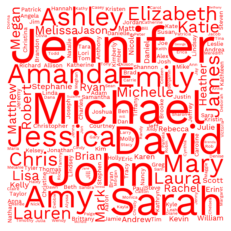

In [73]:
runner_mask = np.array(Image.open('../images/female_runner_big.jpg')) #tried making word cloud in shape of image, but it was difficult to read
runners_mask = np.array(Image.open('../images/runners.jpg'))
multi_runners_mask = np.array(Image.open('../images/multi_runner.jpg'))
wordcloud_shape = WordCloud(font_path = 'WorkSans-VariableFont_wght.ttf', background_color = 'white', height = 800, width = 800, margin=0, min_font_size = 8, 
                            color_func=lambda *args, **kwargs: (255,0,0)).generate(' '.join(races_all['first_name'])) #used ' '.join(races_all['first_name']) to combine all first names without punctuation or value counts

plt.imshow(wordcloud_shape, interpolation="bilinear")
plt.axis('off')
plt.margins(x=0, y=0)
plt.savefig('all8.jpeg')
plt.show()
